## Dataset: [Insurance](https://github.com/thisarakaushan/IBM-Hack-Challenge/blob/main/dataset/insurance.csv)

#### Sanity Checking and Data Preprocessing

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset

df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# finding the shape of the dataset(rows, columns)

df.shape

(1338, 7)

In [5]:
# finding the dtype of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# checking the null values

df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [7]:
df.isnull().sum() # or df.isnull().any()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* for example:
    if there is null values you can fill them with mean, median and mode.
    as a basic example we can give:
        * df['age'] = df['age'].fillna(df['age'].mean())

In [8]:
df['age'].mean(), df['age'].median(), df['age'].mode()[0]

(39.20702541106129, 39.0, 18)

In [9]:
# finding unique values

df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#### EDA - Data Exploratory Analysis

<AxesSubplot:xlabel='bmi', ylabel='charges'>

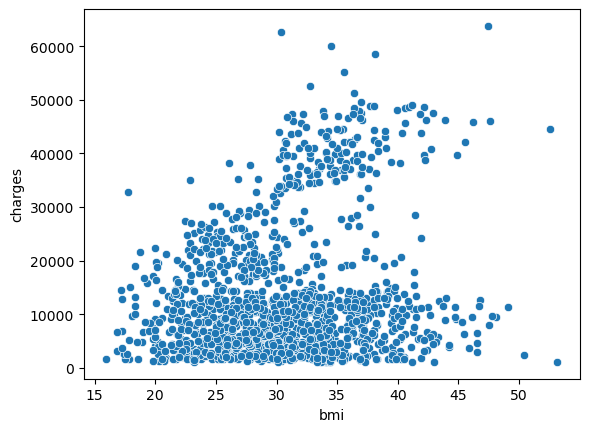

In [11]:
# difference between seaborn and matplotlib graphs

sns.scatterplot(x='bmi', y='charges', data=df)

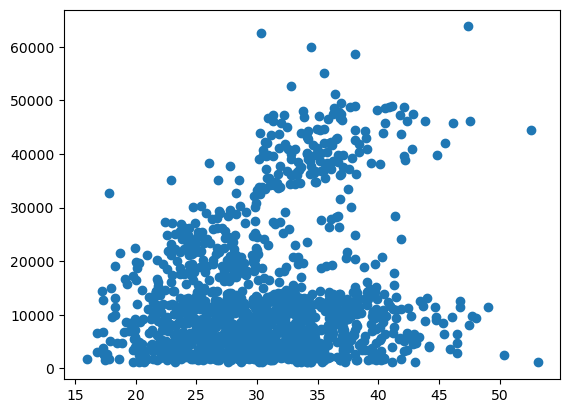

In [12]:
plt.scatter(x='bmi', y='charges', data=df)

* the main difference between both methods are: 
    - we can't see clear visualiztion between matplotlib graph data points
    - as well as seaborn as advanced colors such as mat colors

<AxesSubplot:xlabel='region', ylabel='count'>

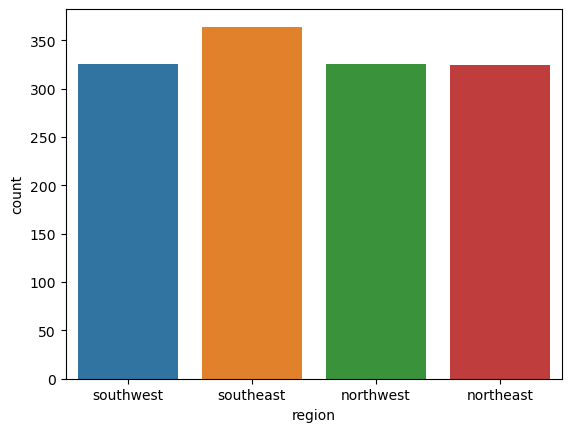

In [13]:
sns.countplot(x='region', data=df)  # or sns.countplot(df['region'])

#### Encoding

* There are 3 types:
    1. One hot encoding
    2. Label encoding
    3. Manual encoding

In [14]:
# one hot encoding on sex column

df_onehot_sex = pd.get_dummies(df, columns=['sex'])
df_onehot_sex

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,0,1
1334,18,31.920,0,no,northeast,2205.98080,1,0
1335,18,36.850,0,no,southeast,1629.83350,1,0
1336,21,25.800,0,no,southwest,2007.94500,1,0


In [15]:
# one hot encoding on sex column

df_onehot_region = pd.get_dummies(df, columns=['region'])
df_onehot_region

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,0,1,0,0
1334,18,female,31.920,0,no,2205.98080,1,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,0,1


In [16]:
# Label encoding 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['regionLabelEncoder'] = le.fit_transform(df['region'])

In [17]:
df

,age,sex,bmi,children,smoker,region,charges,regionLabelEncoder
0,19,female,27.900,0,yes,southwest,16884.92400,3
1,18,male,33.770,1,no,southeast,1725.55230,2
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,2
1336,21,female,25.800,0,no,southwest,2007.94500,3


In [18]:
# manual encoding

df['smokerManualEncoding'] = df['smoker'].replace({'yes':1, 'no':0})

In [19]:
df

,age,sex,bmi,children,smoker,region,charges,regionLabelEncoder,smokerManualEncoding
0,19,female,27.900,0,yes,southwest,16884.92400,3,1
1,18,male,33.770,1,no,southeast,1725.55230,2,0
2,28,male,33.000,3,no,southeast,4449.46200,2,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,2,0
1336,21,female,25.800,0,no,southwest,2007.94500,3,0


In [20]:
df['sex'] = df['sex'].replace({'female':1, 'male':0})

In [21]:
df

,age,sex,bmi,children,smoker,region,charges,regionLabelEncoder,smokerManualEncoding
0,19,1,27.900,0,yes,southwest,16884.92400,3,1
1,18,0,33.770,1,no,southeast,1725.55230,2,0
2,28,0,33.000,3,no,southeast,4449.46200,2,0
3,33,0,22.705,0,no,northwest,21984.47061,1,0
4,32,0,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830,1,0
1334,18,1,31.920,0,no,northeast,2205.98080,0,0
1335,18,1,36.850,0,no,southeast,1629.83350,2,0
1336,21,1,25.800,0,no,southwest,2007.94500,3,0


In [22]:
# Removing the columns

df.drop(['smoker', 'region'], axis=1, inplace=True)

# or

# df = df.drop(['smoker', 'region'], axis=1)

* "inplace = Ture" means whatever we have done, that action has to changed or not
* default inplace = False

In [23]:
df

,age,sex,bmi,children,charges,regionLabelEncoder,smokerManualEncoding
0,19,1,27.900,0,16884.92400,3,1
1,18,0,33.770,1,1725.55230,2,0
2,28,0,33.000,3,4449.46200,2,0
3,33,0,22.705,0,21984.47061,1,0
4,32,0,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,10600.54830,1,0
1334,18,1,31.920,0,2205.98080,0,0
1335,18,1,36.850,0,1629.83350,2,0
1336,21,1,25.800,0,2007.94500,3,0


In [24]:
# again checking whether there is any categorical column or not

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   sex                   1338 non-null   int64  
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   charges               1338 non-null   float64
 5   regionLabelEncoder    1338 non-null   int32  
 6   smokerManualEncoding  1338 non-null   int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 68.1 KB


In [25]:
# Scaling ---> Normalization, Standardization

# Standardization - Zscore Scaler

# Normalization - MinMaxScaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [26]:
sc = StandardScaler()
sc.fit_transform(df)

array([[-1.43876426,  1.0105187 , -0.45332   , ...,  0.2985838 ,
         1.34390459,  1.97058663],
       [-1.50996545, -0.98959079,  0.5096211 , ..., -0.95368917,
         0.43849455, -0.5074631 ],
       [-0.79795355, -0.98959079,  0.38330685, ..., -0.72867467,
         0.43849455, -0.5074631 ],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , ..., -0.96159623,
         0.43849455, -0.5074631 ],
       [-1.29636188,  1.0105187 , -0.79781341, ..., -0.93036151,
         1.34390459, -0.5074631 ],
       [ 1.55168573,  1.0105187 , -0.26138796, ...,  1.31105347,
        -0.46691549,  1.97058663]])

In [27]:
minmax = MinMaxScaler()
minmax.fit_transform(df)

array([[0.02173913, 1.        , 0.3212268 , ..., 0.25161076, 1.        ,
        1.        ],
       [0.        , 0.        , 0.47914985, ..., 0.00963595, 0.66666667,
        0.        ],
       [0.2173913 , 0.        , 0.45843422, ..., 0.05311516, 0.66666667,
        0.        ],
       ...,
       [0.        , 1.        , 0.56201238, ..., 0.00810808, 0.66666667,
        0.        ],
       [0.06521739, 1.        , 0.26472962, ..., 0.01414352, 1.        ,
        0.        ],
       [0.93478261, 1.        , 0.35270379, ..., 0.44724873, 0.33333333,
        1.        ]])

*** we don't need to do both scaling method, it's enough to execute only one method.***

In [28]:
# Splitting the dataset

x = df.drop(['charges'], axis=1) # independent variable
x

,age,sex,bmi,children,regionLabelEncoder,smokerManualEncoding
0,19,1,27.900,0,3,1
1,18,0,33.770,1,2,0
2,28,0,33.000,3,2,0
3,33,0,22.705,0,1,0
4,32,0,28.880,0,1,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,0
1334,18,1,31.920,0,0,0
1335,18,1,36.850,0,2,0
1336,21,1,25.800,0,3,0


In [29]:
y = df['charges'] # dependent variable
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

*** If we have class or categories, we have to go with Classification, otherwise we have to use Regression.***

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

In [31]:

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((936, 6), (936,), (402, 6), (402,))

In [32]:
# Linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(x_test)

In [34]:
comp = pd.DataFrame({'actual value':y_test, 'predicted value':y_pred})
comp  

,actual value,predicted value
578,9724.53000,11051.549098
610,8547.69130,9821.281107
569,45702.02235,37867.572209
1034,12950.07120,16125.705792
198,9644.25250,6920.271325
...,...,...
1261,3277.16100,7163.959140
494,17942.10600,26454.585591
97,10226.28420,14277.024077
418,14418.28040,17354.845390


In [35]:
y_pred

array([11051.54909755,  9821.28110689, 37867.57220923, 16125.70579228,
        6920.27132517,  3879.38549816,  1448.91928088, 14390.17797974,
        9022.95151353,  7458.83371884,  4584.60125463, 10309.9886336 ,
        8693.03891958,  4085.25393494, 27551.60737718, 11151.0640722 ,
       11243.0536825 ,  5962.9521121 ,  8181.9015666 , 26750.7993431 ,
       33448.59842228, 14350.03320383, 11672.89478465, 32235.7832204 ,
        4326.07702625,  9096.53607025,  1045.25196369, 10177.76672094,
        4042.60346751, 10384.28681219,  9035.98983755, 40123.71002379,
       15507.20819083, 13678.264976  , 24481.97362849,  5059.21988589,
       12889.80609711, 30333.92625689, 33301.25091403,  3431.35787088,
        3941.81614597,  4203.90901434, 30219.19050725, 39245.56885373,
       27762.83744249,  4994.74188765, 11042.48621304,  7760.15047885,
        3569.09734756, 10613.61535955,  5544.95921408,  3397.80923785,
       32701.67144343, 38285.57836702, 16290.50463759,  6965.99677468,
      

In [36]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)*100

79.11113876316934